In [1]:
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import gensim, logging
import numpy as np
import unicodedata

In [2]:
logging.basicConfig(format='%(asctime)s : %(Levelname)s : %(message)s', level=logging.INFO)

In [3]:
def make_score_files(model, filelabel):
    with open(filelabel + '_scores.csv', 'w') as scorefile:
        with open(filelabel + '_words.csv', 'w') as wordfile:
            count_scores = 0
            count_words = 0
            for i in range(len(model.index2word)):
                word = model.index2word[i]
                if i == 80:
                    continue
                try:
                    wordfile.write(word + '\n')
                    score = model[word]
                    scores = [str(x) for x in score]
                    scorefile.write('\t'.join(scores) + '\n')
                    #print("word: " + word)
                    count_scores += 1
                    count_words += 1
                except:
                    print "Not found: " + str(i) + ": " + word
                    continue
            print("counts: scores = " + str(count_scores) + "; words = " + str(count_words))     
            #scorefile.write('\n')
            #wordfile.write('\n')    

In [4]:
model = gensim.models.Word2Vec.load('cikm_training_model.txt')

In [164]:
make_score_files(model, 'cikm_training')

Not found: 7911: für
Not found: 8013: __º_
Not found: 9289: º___
Not found: 9399: ___º
Not found: 10850: _º__
Not found: 19179: só
Not found: 20299: über
Not found: 20478: você
Not found: 31046: _º_
Not found: 31186: für_die
Not found: 31780: ν___
Not found: 32715: ½
Not found: 33668: música
Not found: 34724: _о
Not found: 34936: _ε
Not found: 35549: _е
Not found: 35633: ___ν
Not found: 36264: _ν__
Not found: 36839: cómo
Not found: 36911: sólo
Not found: 37052: __ν_
Not found: 37580: __ι_
Not found: 37861: е_
Not found: 37895: _ι__
Not found: 38436: ι___
Not found: 41108: _ν
Not found: 42743: _ε__
Not found: 43091: più
Not found: 43491: ões
Not found: 43941: _ι
Not found: 45817: _о__
Not found: 46184: н
Not found: 46597: ι_
Not found: 47003: о___
Not found: 47361: ___ι
Not found: 47955: _н
Not found: 47967: ν_
Not found: 48689: für_den
Not found: 48827: zurück
Not found: 48948: ε___
Not found: 49299: μ_
Not found: 49763: 人___
Not found: 50043: н_
Not found: 50814: о_
Not found: 51696: 

In [2]:
X = np.loadtxt("cikm_training_scores.csv")

In [3]:
labels = np.genfromtxt("cikm_training_words.csv", dtype=str)

In [4]:
indices = np.random.random_integers(0,len(labels) - 1,2000)

In [5]:
X_sub = X[indices]

In [6]:
labels_sub = labels[indices]

In [7]:
import tsne

In [ ]:
Y = tsne.tsne(X_sub, 2, 50, 20.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  2000 ...


In [14]:
#Y = np.loadtxt('cikm_training_t-sne.csv',delimiter=',')

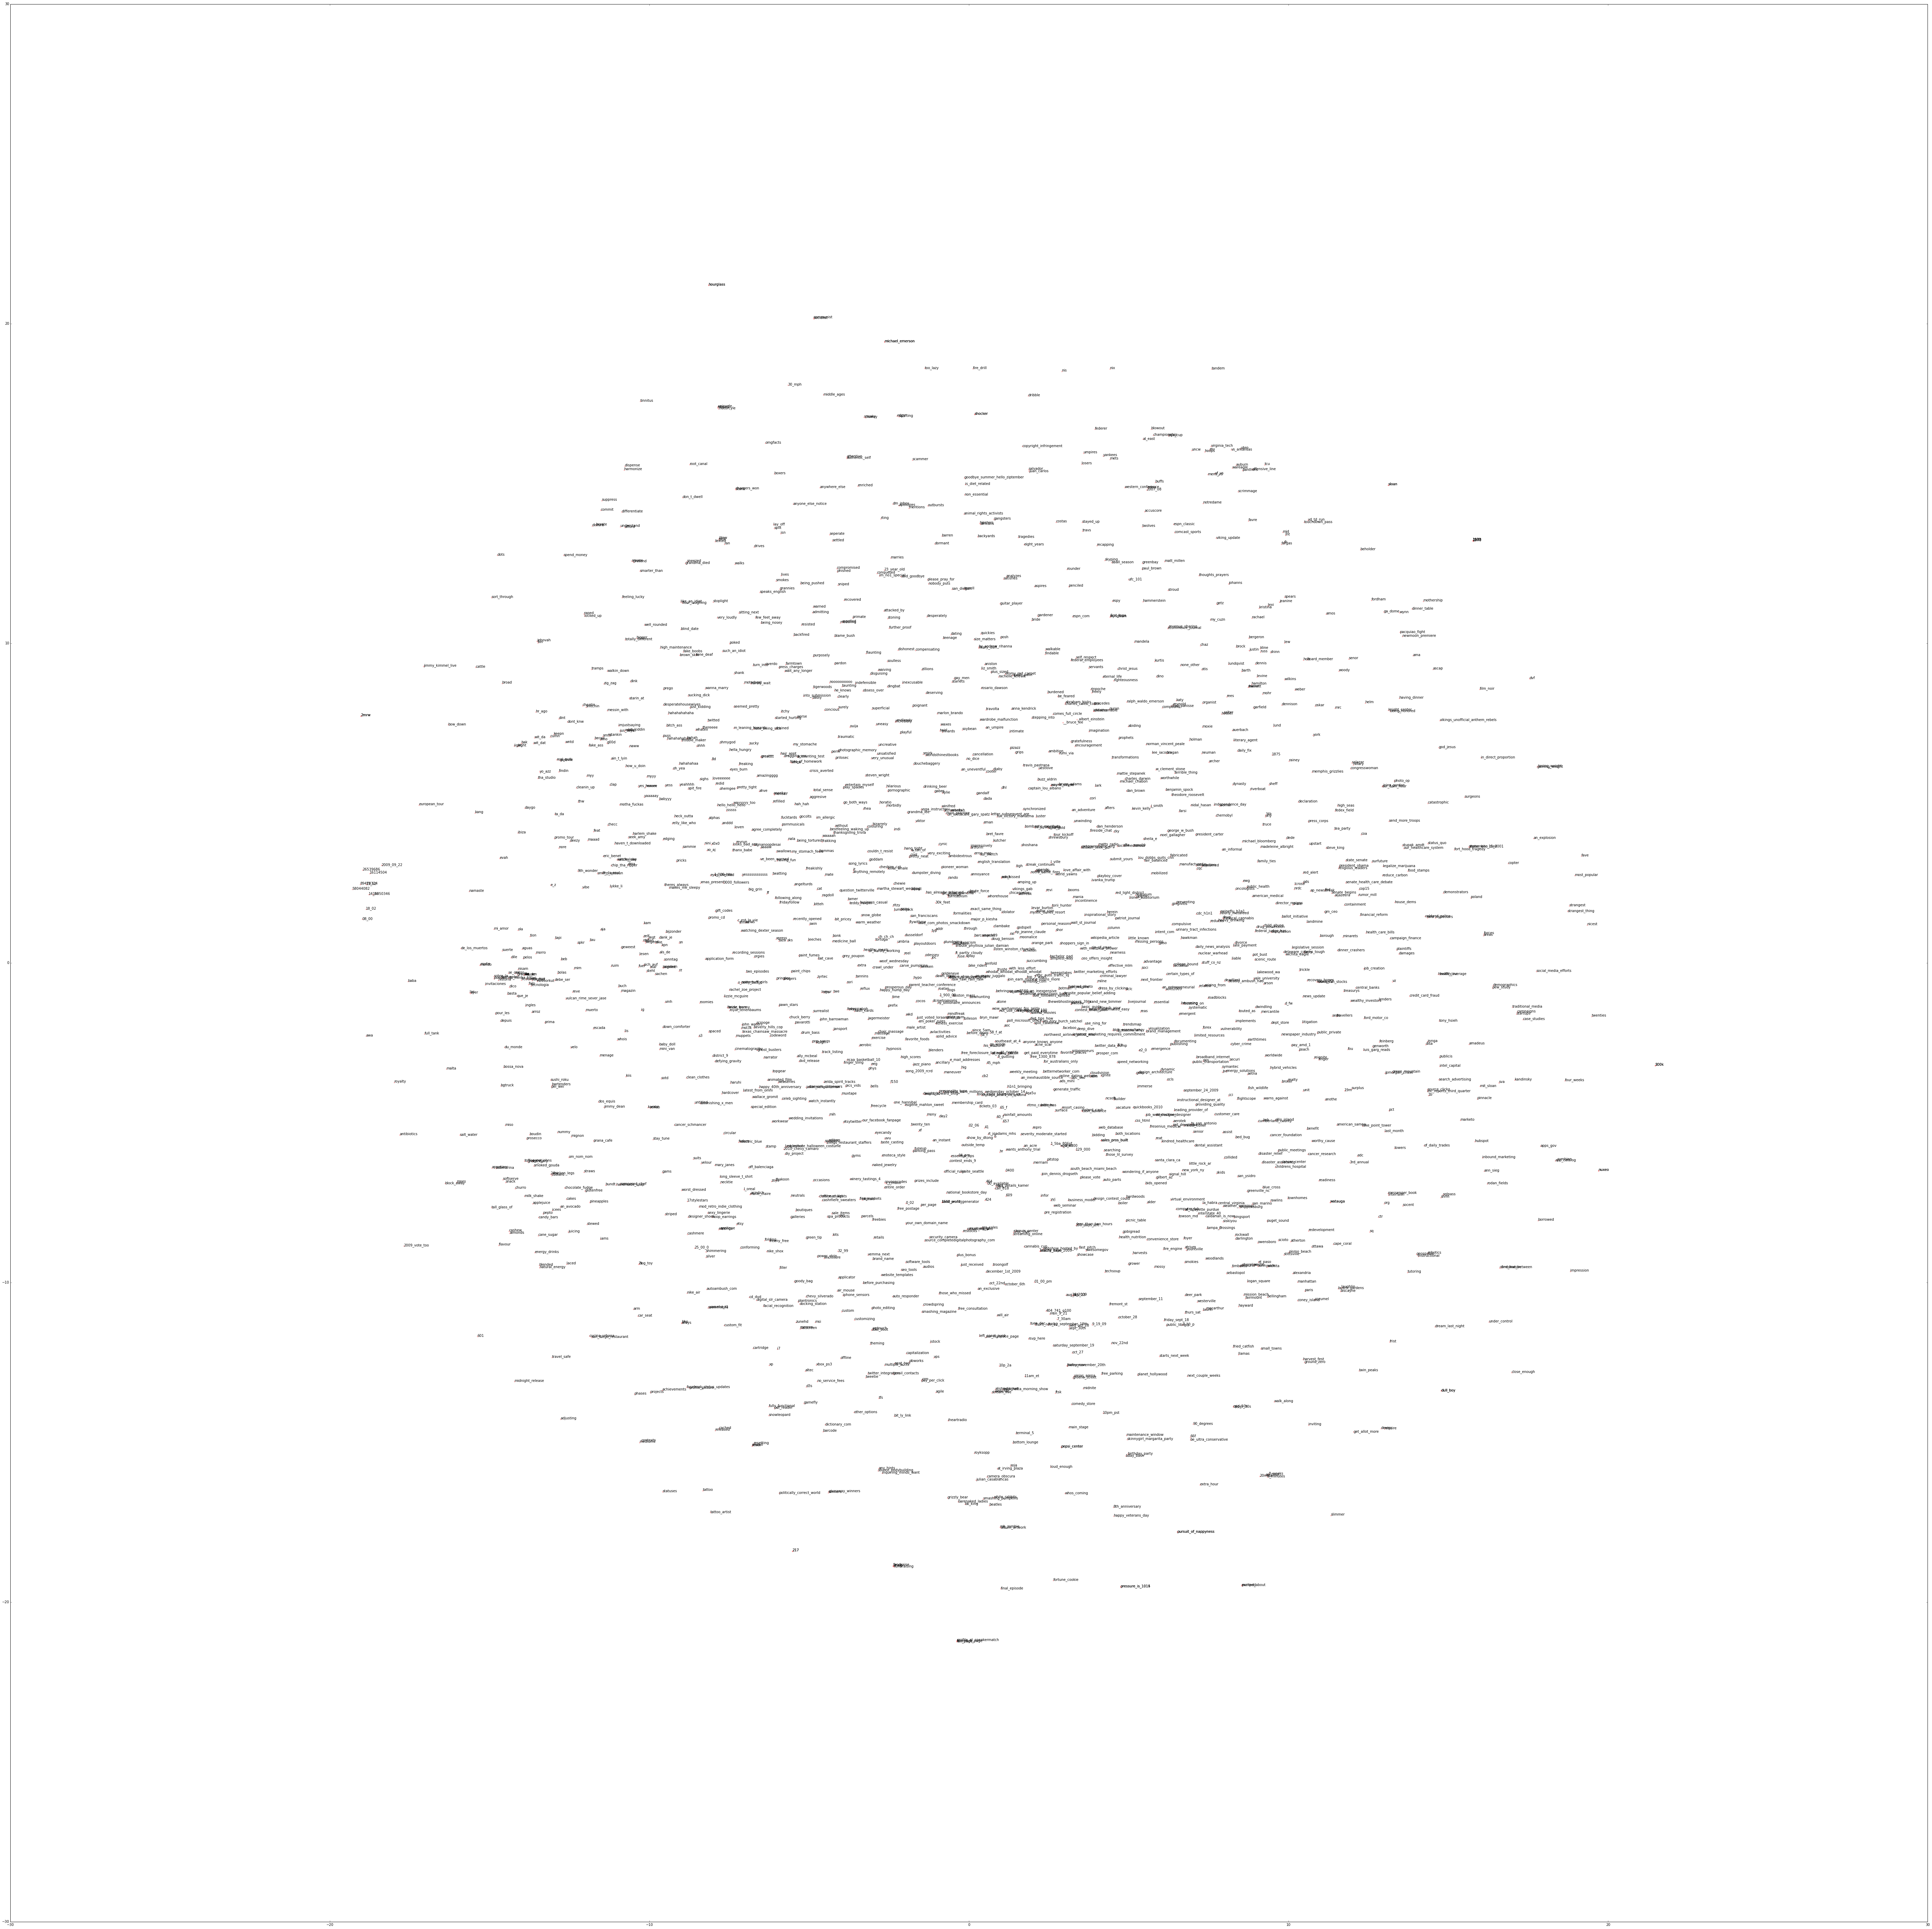

In [20]:
#plotting
#%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 100))
# only turn off after checking the axis min/max
#plt.axis('off')
plt.scatter(Y[:,0], Y[:,1], s=10, color='red', alpha=0.2)

for i in range(len(Y[:,0])):
    plt.annotate(labels_sub[i], (Y[i,0], Y[i,1]))

plt.savefig('test_words.png',bbox_inches='tight')

In [8]:
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#pca = PCA(n_components=50,whiten=True,copy=True)
#X_new = pca.fit_transform(X) 
#tsne = TSNE(n_components=50,perplexity=20.0,random_state=0)
#X_tsne = tsne.fit_transform(X)